# Movie Analysis

> Hypothetical Situation: Microsoft wants to start a movie film company.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data

In [94]:
df_bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [2]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Sorted df_bom_gross by 'domestic_gross' column to find top performing films:

In [30]:
df_bom_gross.sort_values(by='domestic_gross',ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


# Load Data

In [31]:
df_title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Converted genres column from object to string:

In [54]:
df_title_basics['genres'] = df_title_basics.genres.astype(str)

Function to create a new dataframe of a column for each genre from the genre column:

In [89]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):

SyntaxError: unexpected EOF while parsing (<ipython-input-89-b42b7beca15b>, line 1)

In [62]:
list_all_genres = ','.join(df_title_basics['genres'].unique())
unique_genres = set(list_all_genres.split(','))
unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 'nan'}

# Load Data

In [32]:
df_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Merged column 'tconst' between df_title_basics and df_title_ratings:

In [76]:
merged_basics_and_ratings = pd.merge(df_title_basics, df_title_ratings, on=['tconst'], how='inner')
merged_basics_and_ratings.sort_values(by='averagerating',ascending=False).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,Calamity Kevin,2019,77.0,"Adventure,Comedy",10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
73616,tt9715646,Renegade,Renegade,2019,NaN,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History",10.0,6


In [77]:
merged_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Sorted new merged_basics_and_ratings dataframe by top 50 number of votes, creating new df4, then sort by average rating where numvotes column is greater than 50,000 creating new df5:

In [78]:
df4 = merged_basics_and_ratings.sort_values(by='numvotes',ascending=False).head(50)
df5 = df4[df4['numvotes'] > 50000].sort_values(by='averagerating',ascending=False)

Joined df5 with df_bom_gross creating new joined_df showing movies sorted by 'averagerating' where there are more than 50,000 'numvotes':

In [79]:
joined_df = df5.join(df_bom_gross, how='left')
joined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Deepwater Horizon,LG/S,61400000.0,60400000,2016.0
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Last Train Home,Zeit.,288000.0,NaN,2010.0
26774,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916,NaN,NaN,NaN,NaN,NaN
43419,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,NaN,NaN,NaN,NaN,NaN
7125,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,NaN,NaN,NaN,NaN,NaN


Bar graph showing genres with highest domestic gross:

<AxesSubplot:xlabel='genres'>

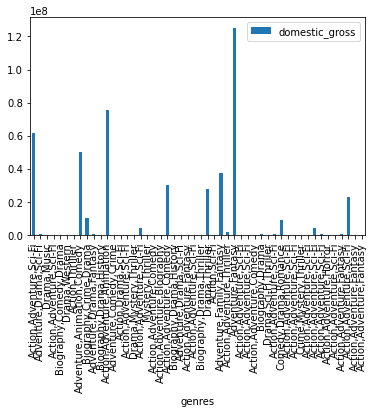

In [63]:
joined_df.plot(kind='bar', x='genres', y='domestic_gross')

Bar graph showing genres with highest average rating:

<AxesSubplot:xlabel='genres'>

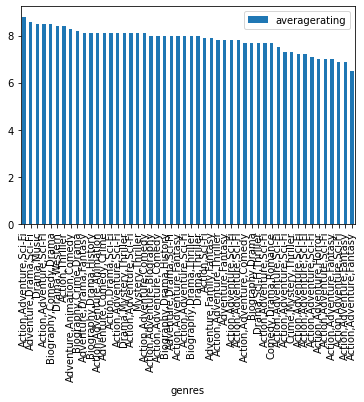

In [64]:
joined_df.plot(kind='bar', x='genres', y='averagerating')

# Load Data

In [15]:
df_movies = pd.read_csv('data/tmdb.movies.csv.gz')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [34]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Sorted df_movies by highest popularity:

In [97]:
highest_popularity = df_movies.sort_values(by='popularity', ascending=False)
highest_popularity.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


# Load Data

In [37]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Changed 'worldwide_gross' and 'production_budget' columns from objects to intergers:

In [102]:
df_budgets['worldwide_gross'] = df_budgets.worldwide_gross.replace('[\$,]','', regex=True).astype(int)
df_budgets['production_budget'] = df_budgets.production_budget.replace('[\$,]','', regex=True).astype(int)

In [101]:
highest_worldwide_gross = df_budgets.sort_values(by='worldwide_gross',ascending=False)
highest_worldwide_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,200000000.0,"$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625",1648854864
